## Pediatric ALL DEG analysis
---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

import rpy2.rinterface
#ipython extension
%load_ext rpy2.ipython
from rpy2.robjects import pandas2ri
pandas2ri.activate()

#seaborn Gr-Bk-Rd palette
pal = sns.diverging_palette(127.7, 12.2, l=53.4, n=255, center="dark")

#font scale
sns.set(font_scale=1.3)


#DEG cutoff func.
pval = 0.05
logfc = 1

def degpl(deg):
    m = deg['P.Value'] < pval
    m_pl = deg['logFC'] > logfc
    
    deg_pl = deg[m][m_pl]
    
    print('deg_pl: ', deg_pl.shape)
    return deg_pl

def degmi(deg):
    m = deg['P.Value'] < pval
    m_mi = deg['logFC'] < -logfc
    
    deg_mi = deg[m][m_mi]
    print('deg_mi: ', deg_mi.shape)
    return deg_mi

---
## GSE28460

In [2]:
%%R
#DEG analysis
library(GEOquery)
library(limma)

gse <- getGEO("GSE28460",GSEMatrix=TRUE)
gse <- gse[[1]]

#exp data
eset <- exprs(gse)

#probe id to gene symbol
fset <- fData(gse)

symbols <- fset[,"Gene Symbol"]
rownames(eset) <- symbols

pset <- phenoData(gse)

eset2 = eset
pset3 = pset

grp <- pset3$'source_name_ch1'
design <- model.matrix(~0 + grp)
design = design[,1:2]
colnames(design)

colnames(design) <- c("diagnosis","relapse")

#fit
fit <- lmFit(eset2,design)
cont <- makeContrasts(relapse-diagnosis,levels=design)
fit.cont <- contrasts.fit(fit,cont)
fit.cont <- eBayes(fit.cont)
res <- topTable(fit.cont,number=Inf)

#data output
write.csv(res, file="./28460/res.csv")


#eset for visualization
genes = c('SHCBP1', 'CDCA5', 'TTK', 'MPO', 'TAGAP', 'GUCY1A3', 'CRIP1', 'SCML4')

eset28460 = eset[genes,]

eset_d = eset28460[,pset$'source_name_ch1' == 'diagnosis']
eset_r = eset28460[,pset$'source_name_ch1' == 'relapse']

esets = data.frame('Diagnodis' = rowMeans(eset_d), 'Relapse' = rowMeans(eset_r))
eset28460 = data.frame(t(eset28460))

write.csv(esets, file='./28460/esets.csv')
write.csv(eset28460, file='./28460/eset28460.csv')

In [3]:
#DEG cutoff
deg = pd.read_csv('./28460/res.csv')

print('deg----------------------------')
deg_pl = degpl(deg)
deg_mi = degmi(deg)

deg_pl.to_csv('./28460/deg_pl.csv')
deg_mi.to_csv('./28460/deg_mi.csv')

deg----------------------------
deg_pl:  (1796, 8)
deg_mi:  (1784, 8)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


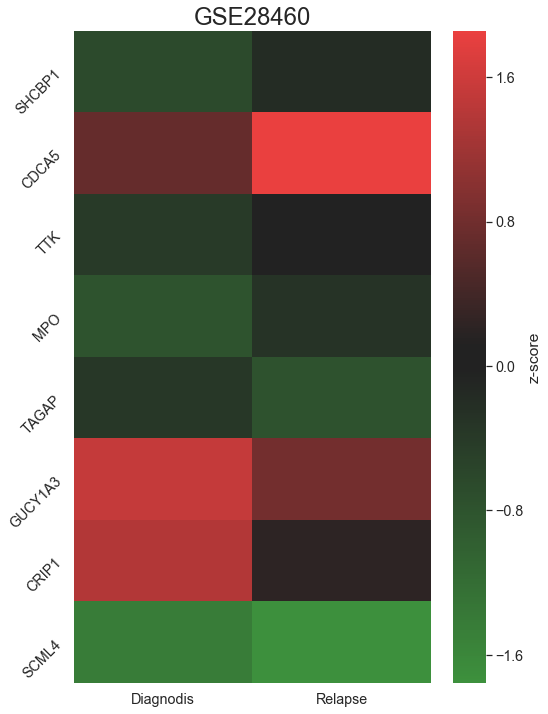

In [4]:
#heatmap
esets = pd.read_csv('./28460/esets.csv', index_col=0)

esets = esets.apply(zscore)

plt.subplots(figsize = (8, 12))
sns.heatmap(esets, cmap=pal, cbar_kws={'label': 'z-score'}).set_title('GSE28460', fontsize=24)
plt.yticks(rotation=45)
plt.savefig('./heatmap_gse28460.png', dpi=300)

---
## GSE69026

In [5]:
%%R
#DEG analysis

gse <- getGEO("GSE60926",GSEMatrix=TRUE)
gse <- gse[[1]]

#exp data
eset <- exprs(gse)

#probe id to gene symbol
fset <- fData(gse)

symbols <- fset[,"Gene Symbol"]
rownames(eset) <- symbols

pset <- phenoData(gse)

eset2 = t(eset)


pset3 = pset[pset$'source_name_ch1' != 'ALL - CNS - Relapse']
eset2 = eset2[pset$'source_name_ch1' != 'ALL - CNS - Relapse',]


eset2 = t(eset2)

grp <- pset3$'source_name_ch1'
design <- model.matrix(~0 + grp)
design = design[,1:2]
colnames(design)

colnames(design) <- c("diagnosis","relapse")

#fit
fit <- lmFit(eset2,design)
cont <- makeContrasts(relapse-diagnosis,levels=design)
fit.cont <- contrasts.fit(fit,cont)
fit.cont <- eBayes(fit.cont)
res <- topTable(fit.cont,number=Inf)

#data output
write.csv(res, file="res.csv")


#eset for visualization
genes = c('SHCBP1', 'CDCA5', 'TTK', 'MPO', 'TAGAP', 'GUCY1A3', 'CRIP1', 'SCML4')

eset60926 = eset[genes,]

eset_d = eset60926[,pset$'source_name_ch1' == 'ALL - bone marrow - Diagnosis']
eset_r = eset60926[,pset$'source_name_ch1' == 'ALL - bone marrow - Relapse']

esets = data.frame('Diagnodis' = rowMeans(eset_d), 'Relapse' = rowMeans(eset_r))
eset60926 = data.frame(t(eset60926))

write.csv(esets, file='./60926/esets.csv')
write.csv(eset60926, file='./60926/eset60926.csv')

In [6]:
#DEG cutoff
deg = pd.read_csv('./60926/res.csv')

print('deg----------------------------')
deg_pl = degpl(deg)
deg_mi = degmi(deg)

deg_pl.to_csv('./60926/deg_pl.csv')
deg_mi.to_csv('./60926/deg_mi.csv')

deg----------------------------
deg_pl:  (14, 8)
deg_mi:  (20, 8)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


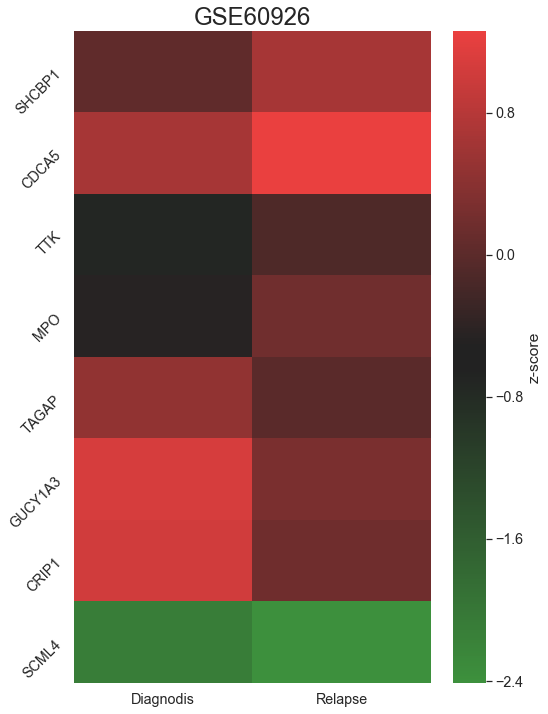

In [7]:
#heatmap
esets = pd.read_csv('./60926/esets.csv', index_col=0)

esets = esets.apply(zscore)

plt.subplots(figsize = (8, 12))
sns.heatmap(esets, cmap=pal, cbar_kws={'label': 'z-score'}).set_title('GSE60926', fontsize=24)
plt.yticks(rotation=45)
plt.savefig('./heatmap_gse60926.png', dpi=300)

---
## TARGET-ALL

In [8]:
#data input
table = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
rna = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

rna.columns = rna.iloc[0,:]
rna = rna[2:]

table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

#########################################non-paired sample
m = table['Sample ID'].str.contains('-04') == True
m2 = table['Sample ID'].str.contains('-09') == True

paired = pd.concat([table[m], table[m2]])
paired = paired.sort_values(by='Sample ID').reset_index()

paired['Relapse'] = paired['Sample ID'].str.contains('-04') == True

#data output
eset = paired.loc[:,'DDR1':'LOC652743']
pset = paired.loc[:, ['Sample ID', 'Relapse']]

eset.to_csv('./eset.csv')
pset.to_csv('./pset.csv')

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

In [9]:
%%R
#DEG analysis
eset = t(read.csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/eset.csv'))
pset = read.csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/pset.csv')

colnames(eset) <- eset[1,]

eset <- eset[-1,]

col1 = as.integer(pset['Relapse'] == 'False')
col2 = as.integer(pset['Relapse'] == 'True')

design = data.frame(col1, col2)

colnames(design) <- c("ctrl","relapse")

#fit
fit <- lmFit(eset,design)
cont <- makeContrasts(relapse-ctrl,levels=design)
fit.cont <- contrasts.fit(fit,cont)
fit.cont <- eBayes(fit.cont)
res <- topTable(fit.cont,number=Inf)

write.csv(res, file="res.csv")


#eset for visualization
genes = c('SHCBP1', 'CDCA5', 'TTK', 'MPO', 'TAGAP', 'GUCY1A3', 'CRIP1', 'SCML4')

eset_target = eset[genes,]

eset_d = eset_target[,pset['Relapse'] == 'False']
eset_r = eset_target[,pset['Relapse'] == 'True']

esets = data.frame('Diagnodis' = rowMeans(eset_d), 'Relapse' = rowMeans(eset_r))
eset_target = data.frame(t(eset_target))

write.csv(esets, file='./cBioPotal/all_phase2_target_2018_pub_(pediatric)/esets.csv')
write.csv(eset_target, file='./cBioPotal/all_phase2_target_2018_pub_(pediatric)/eset_target.csv')

In [10]:
#DEG cutoff
deg = pd.read_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/res.csv')

print('deg----------------------------')
deg_pl = degpl(deg)
deg_mi = degmi(deg)

deg_pl.to_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/deg_pl.csv')
deg_mi.to_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/deg_mi.csv')

deg----------------------------
deg_pl:  (2280, 7)
deg_mi:  (2219, 7)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


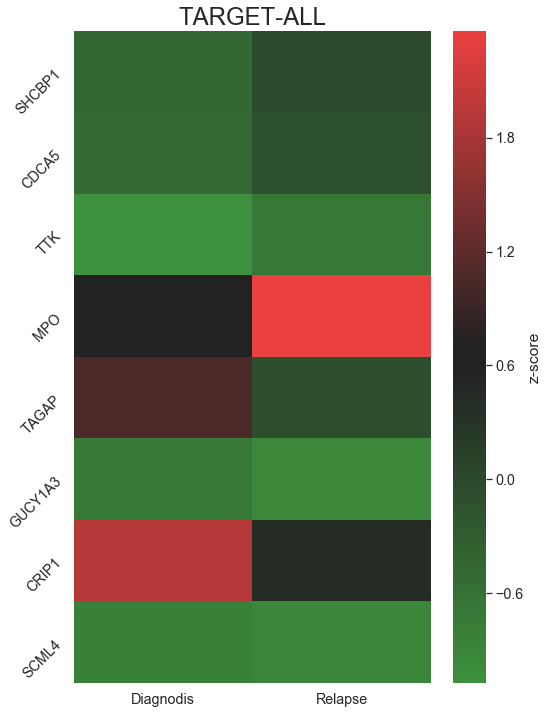

In [11]:
#heatmap
esets = pd.read_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/esets.csv', index_col=0)

esets = esets.apply(zscore)

plt.subplots(figsize = (8, 12))
sns.heatmap(esets, cmap=pal, cbar_kws={'label': 'z-score'}).set_title('TARGET-ALL', fontsize=24)
plt.yticks(rotation=45)
plt.savefig('./heatmap_target.png', dpi=300)

---
## common DEGs

In [12]:
#pl
gse28460_pl = pd.read_csv("./28460/deg_pl.csv")
gse60926_pl = pd.read_csv("./60926/deg_pl.csv")
target_pl = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/deg_pl.csv")
target_pl.rename(columns = {"Unnamed: 0.1": "ID"}, inplace = True)

#mi
gse28460_mi = pd.read_csv("./28460/deg_mi.csv")
gse60926_mi = pd.read_csv("./60926/deg_mi.csv")
target_mi = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/deg_mi.csv")
target_mi.rename(columns = {"Unnamed: 0.1": "ID"}, inplace = True)

#merge
merge_pl = pd.merge(gse28460_pl, target_pl, on = 'ID')
merge_pl = pd.merge(gse60926_pl, merge_pl, on = 'ID')
merge_pl = merge_pl.drop_duplicates(['ID'])
merge_pl.to_csv('./DEG_merge/merge_pl.csv')

merge_mi = pd.merge(gse28460_mi, gse60926_mi, on = 'ID')
merge_mi = pd.merge(target_mi, merge_mi, on = 'ID')
merge_mi = merge_mi.drop_duplicates(['ID'])
merge_mi.to_csv('./DEG_merge/merge_mi.csv')

---
## Violinplot

In [13]:
e_28460 = pd.read_csv('./28460/eset28460.csv', index_col=0)
e_60926 = pd.read_csv('./60926/eset60926.csv', index_col=0)
e_target = pd.read_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/eset_target.csv', index_col=0)

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


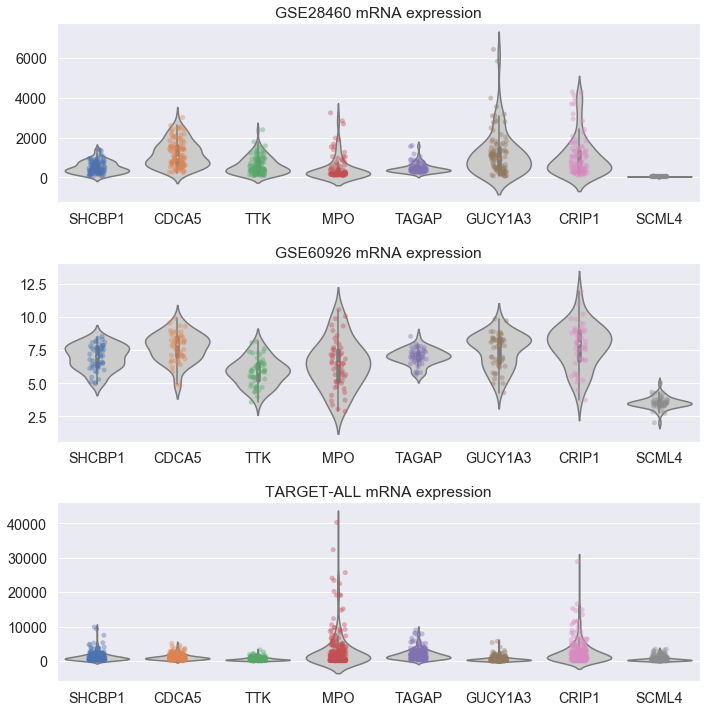

In [14]:
esets = [e_28460, e_60926, e_target]
esets2 = ['GSE28460', 'GSE60926', 'TARGET-ALL']

f, axes = plt.subplots(3, 1, figsize=(10,10))
j=0

for i in esets:
    axes[j].set_title('%s mRNA expression' %esets2[j])
    sns.violinplot(data=i, color="0.8", ax=axes[j], scale='width')
    sns.stripplot(data=i, jitter=True, alpha=0.4, ax=axes[j])
    plt.tight_layout(h_pad=2)
    j=j+1
    
f.savefig('./violinplot.png', dpi=300)